In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv('wine.csv')
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
data.describe()
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.data = data.iloc[:,1:]
data.data.head()
# Converting into numpy array
df= data.data.values
df

<ipython-input-4-cd9adbbc28da>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.data = data.iloc[:,1:]


array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
# Normalizing the numerical data
data_normal = scale(df)
data_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [6]:
pca=PCA(n_components=13)
pca_values=pca.fit_transform(data_normal)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [7]:
#loadings or weights
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [8]:
# The amount of variance that each PCA explains is
var=pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [9]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

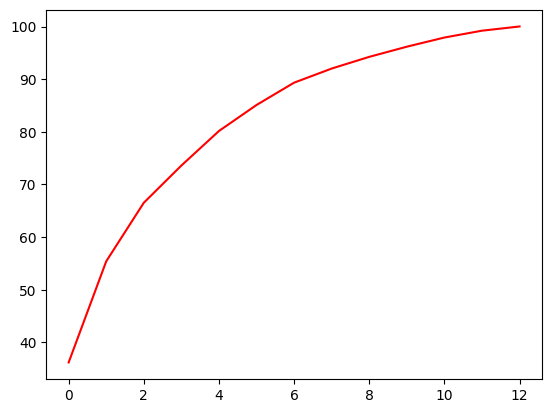

In [10]:
# Variance plot for PCA components obtained
plt.plot(var1,color="red")

In [11]:
 pca_values[:,0:1]

array([[ 3.31675081],
       [ 2.20946492],
       [ 2.51674015],
       [ 3.75706561],
       [ 1.00890849],
       [ 3.05025392],
       [ 2.44908967],
       [ 2.05943687],
       [ 2.5108743 ],
       [ 2.75362819],
       [ 3.47973668],
       [ 1.7547529 ],
       [ 2.11346234],
       [ 3.45815682],
       [ 4.31278391],
       [ 2.3051882 ],
       [ 2.17195527],
       [ 1.89897118],
       [ 3.54198508],
       [ 2.0845222 ],
       [ 3.12440254],
       [ 1.08657007],
       [ 2.53522408],
       [ 1.64498834],
       [ 1.76157587],
       [ 0.9900791 ],
       [ 1.77527763],
       [ 1.23542396],
       [ 2.18840633],
       [ 2.25610898],
       [ 2.50022003],
       [ 2.67741105],
       [ 1.62857912],
       [ 1.90269086],
       [ 1.41038853],
       [ 1.90382623],
       [ 1.38486223],
       [ 1.12220741],
       [ 1.5021945 ],
       [ 2.52980109],
       [ 2.58809543],
       [ 0.66848199],
       [ 3.07080699],
       [ 0.46220914],
       [ 2.10135193],
       [ 1

In [12]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), data[['Type']]], axis = 1)
finalDf

,pc1,pc2,Type
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1
...,...,...,...
173,-3.370524,-2.216289,3
174,-2.601956,-1.757229,3
175,-2.677839,-2.760899,3
176,-2.387017,-2.297347,3


In [13]:
import matplotlib.pyplot as plt
plt.style.use('classic')

<Axes: xlabel='pc1', ylabel='pc2'>

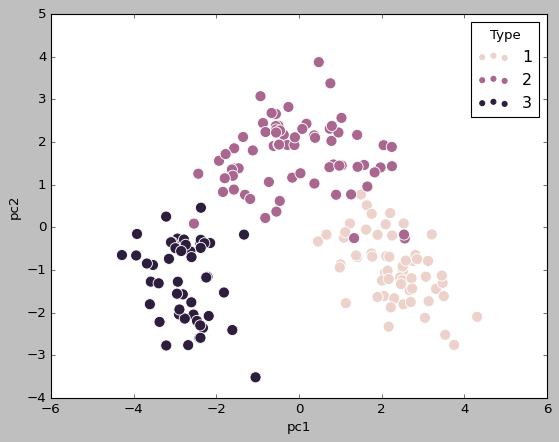

In [14]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type',s=100)

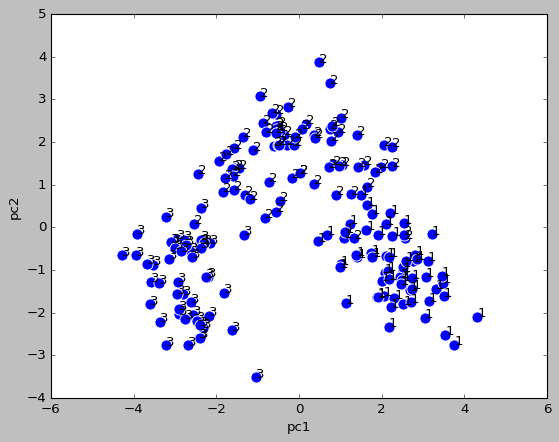

In [15]:
p1 = sns.scatterplot(data=finalDf,x='pc1',y='pc2',s = 100)
for line in range(0,finalDf.shape[0]):
     p1.text(finalDf.pc1[line], finalDf.pc2[line], finalDf.Type[line], horizontalalignment='left', size='medium')

In [16]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram
import numpy as np

In [17]:
# Preprocess the data
X = data.iloc[:, 1:]  # Exclude the class column
X


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [18]:
# Perform PCA
pca=PCA(n_components=3)
pca_scores=pca.fit_transform(X)
pca_scores

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00],
       [ 7.33240139e+02,  1.92729032e-01, -9.17257016e-01],
       [-1.15714285e+01,  1.84899946e+01, -5.54422076e-01],
       [ 7.03231192e+02, -3.32158674e-01,  9.49375334e-01],
       [ 5.42971581e+02, -1.35189666e+01,  2.12694283e+00],
       [ 5.48401860e+02,  1.14494324e+01,  4.04924202e-02],
       [ 2.98036863e+02, -8.18015784e+00,  3.88097517e+00],
       [ 2.98049553e+02, -7.10154294e+00,  1.55845533e+00],
       [ 7.63079712e+02, -8.33431723e+00, -1.88629037e+00],
       [ 5.32943228e+02, -1.42876338e+01,  1.30335240e-01],
       [ 5.72834410e+02, -2.10050143e+01,  3.72614859e-01],
       [ 4.02925358e+02, -1.61026352e+01,  5.67513986e+00],
       [ 8.00053394e+02, -1.21184472e+01,  3.04652991e+00],
       [ 5.63245578e+02,  2.21482866e+00, -5.25510985e-01],
       [ 5.33379651e+02,  1.08048022e+01

In [19]:
#Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
hierarchical.fit(pca_scores)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

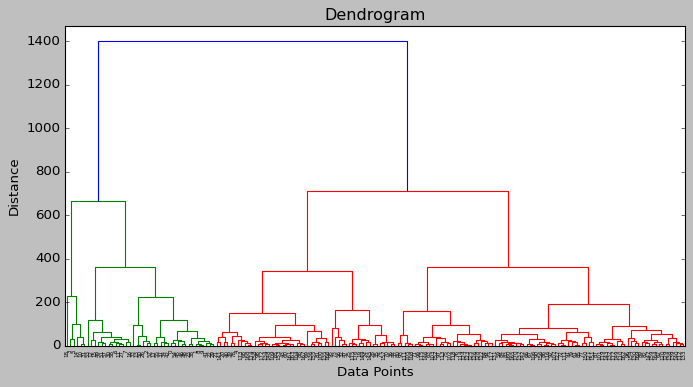

In [23]:
# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(pca_scores, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, orientation='top')
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [35]:
k_values=range(2,24)
inertia=[]

In [27]:
import warnings
warnings.filterwarnings('ignore')
for k in k_values:
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(pca_scores)
  inertia.append(kmeans.inertia_)


Text(0, 0.5, 'PC2')

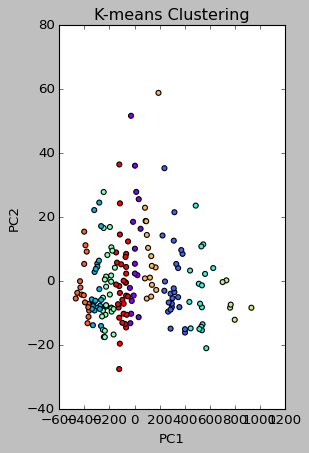

In [32]:
## K-means Clustering
kmeans_labels = kmeans.labels_
plt.subplot(122)
plt.scatter(pca_scores[:, 0], pca_scores[:, 1], c=kmeans_labels, cmap='rainbow')
plt.title('K-means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [52]:
if len(inertia) > 0:
    # Plot the elbow curve
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, inertia, 'bo-')
    plt.title('Scree Plot / Elbow Curve')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.show()
else:
    print("No inertia values found.")

No inertia values found.


In [48]:
if inertia:
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, inertia, 'bo-')
    plt.title('Scree Plot / Elbow Curve')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.show()
else:
  print("No inertia values found.")

No inertia values found.


In [ ]:
# Inertia value is empty so we cannot blot the graph#